In [1]:
#!pip install gym
from IPython.display import display, clear_output

import gym
import matplotlib.pyplot as plt
import numpy as np
import random
import time

%matplotlib inline  

In [2]:
def imshow(render:np.array) -> None:
    plt.imshow(render)
    plt.axis("off")
    plt.show()  

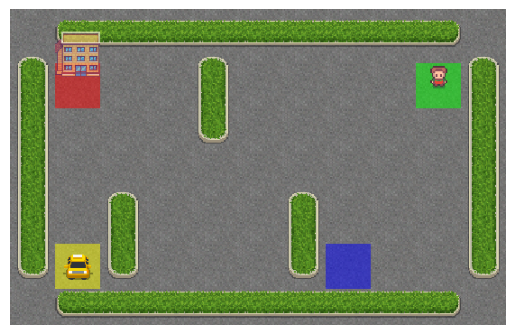

Action Space Discrete(6)
State Space Discrete(500)


In [3]:
env = gym.make("Taxi-v3", render_mode="rgb_array").env
env.reset()
imshow(env.render())

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

#### Implementation of the Q-Learning

$$Q(s,a) = (1-\alpha)Q(s,a) + \alpha \left[ R(s,a) + \gamma \max_{a'} \left\{Q'(s',a') \right\} \right]$$

In [24]:
steps = 10_000
epsilon = 1
epsilon_decay = 0.999
alpha = 0.9
gamma = 0.9

Q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [25]:
fig, ax = plt.subplots(1)

state = env.reset()
state = state[0]

DISPLAY = False

for step in range(steps):
    done = False

    while not done:
        if epsilon > random.random():
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_table[state, :])
            
        state_t, reward, done, info, _ = env.step(action)

        Q_table[state,action] =  (1-alpha)*Q_table[state,action] + \
                    alpha*(reward + gamma*np.max(Q_table[state_t, :]))

        if not done:
            state = state_t
        else:
            state = env.reset()
            state = state[0]
            
            epsilon *= epsilon_decay

        if(DISPLAY):
            ax.cla()
            ax.imshow(env.render())
            ax.axis("off")
            
            display(fig)
            
            clear_output(wait = True)
            plt.pause(0.5)
            
    if step % 100 == 0:
        clear_output(wait=True)
        print("Episode: {}".format(step))
    
plt.close()

Episode: 9900


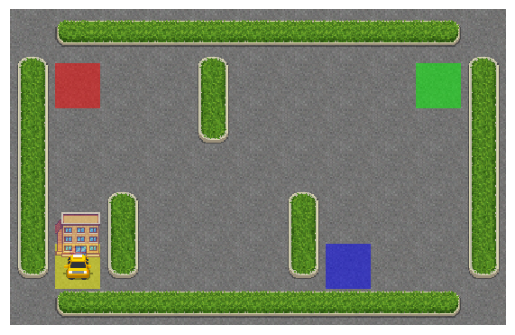

In [29]:
fig, ax = plt.subplots(1)
done = False


state = env.reset()
state = state[0]
while not done:
    action = np.argmax(Q_table[state, :])
        
    state_t, reward, done, info, _ = env.step(action)
    state = state_t


    ax.cla()
    ax.imshow(env.render())
    ax.axis("off")
    
    display(fig)
    
    clear_output(wait = True)
    plt.pause(0.3)

